# What is GMM?

**GMM**은 **Gaussian Mixture Model**로 데이터가 여러 개의 가우시안 분포(Gaussian Distribution)로 구성된 모델이라고 가정해 군집화를 하는 방법입니다. 
* 가우시안 분포는 아래 url을 참고하세요.

http://norman3.github.io/prml/docs/chapter02/3_1.html

n개의 데이터가 있을 때 개별 데이터들이 m개의 정규분포 중 어느 정규 분포에 속하는지 결정하는 방식입니다.

GMM은 **EM(Expectation & Maximization)방법**을 사용하는데 EM알고리즘은 아래 url을 참고하세요

https://ko.wikipedia.org/wiki/기댓값_최대화_알고리즘

GMM의 주요 파라미터는 **n_components**입니다. n_components는 모델의 총 개수입니다.

In [8]:
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture

import pandas as pd

In [3]:
gmm = GaussianMixture(n_components = 3, random_state = 211)

In [5]:
cluster = gmm.fit_predict(load_iris().data)

In [10]:
df = pd.DataFrame(load_iris().data, columns = load_iris().feature_names)

In [12]:
df['target'] = load_iris().target

In [14]:
df['cluster'] = cluster

In [16]:
df.groupby('target').cluster.value_counts()

target  cluster
0       1          50
1       0          45
        2           5
2       2          50
Name: cluster, dtype: int64

실제 타겟 분포와 거의 유사하게 군집화가 된 것을 알 수 있습니다.
***

### GMM과 K-Means 비교

K-Means는 원형의 범위로 군집화를 수행하기 때문에 데이터가 원형의 범위를 가질수록 K-Means의 성능이 좋습니다. 즉 데이터가 원형의 범위를 가지지 않을 경우 군집화가 제대로 되지 않을 수 있다는 것을 의미합니다. 실제로 K-Means와 GMM의 군집화 결과를 비교해보도록 하겠습니다.

In [51]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

In [121]:
X, y = make_blobs(n_samples = 300, n_features = 2, centers = 3, random_state = 0, cluster_std = .6)

In [122]:
t = [[.607592, -.638103], [-.408123, .843619]]

In [123]:
new_X = np.dot(X, t)

데이터를 타원형의 형태로 바꾸겠습니다.

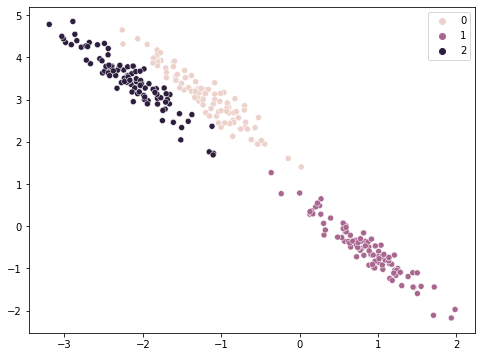

In [124]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = new_X[:, 0], y = new_X[:, 1], hue = y)
plt.show()

실제 데이터는 위와 같은 형태의 데이터입니다.

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

K-Means를 적용하여 시각화 해보도록 하겠습니다.

In [126]:
km = KMeans(3, random_state = 0)

In [127]:
km_cluster = km.fit_predict(new_X)

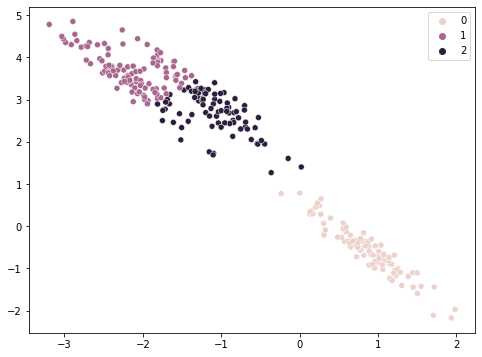

In [128]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = new_X[:, 0], y = new_X[:, 1], hue = km_cluster)
plt.show()

K-Means는 원형으로 군집화를 진행하기 때문에 실제 데이터를 원형의 형태로 군집화를 했기 때문에 실제 label과 다른 cluster로 할당 된 것을 알 수 있습니다.

그렇다면 이번에는 GMM으로 군집화를 진행해보도록 하겠습니다.

In [129]:
gmm = GaussianMixture(n_components = 3, random_state = 0)
gmm_label = gmm.fit_predict(new_X)

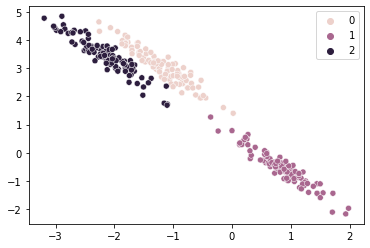

In [130]:
sns.scatterplot(x = new_X[:, 0], y = new_X[:, 1], hue = gmm_label)
plt.show()

GMM을 적용한 군집화의 경우 실제 데이터의 레이블과 매우 유사하게 진행된 것을 알 수 있습니다.

GMM의 경우 K-Means 보다 유연하고 다양한 데이터에 적용이 잘되지만 수행 시간이 오래 걸린다는 단점이 존재합니다.

지금까지 GMM에 대해 살펴보았는데 다음 챕터에서는 군집화의 마지막 알고리즘은 DBSCAN에 대해서 알아보도록 하겠습니다. 감사합니다.